# **Laboratorio 1**

**Integrantes**:
- Monserrath Morales
- Alonso Maurel

#**1) CARGAR Y PREPROCESAMIENTO DE DATAS**

In [ ]:
# CARGAR DATAFRAMES
import gdown
import zipfile
import pandas as pd
import os

# ID del archivo en Google Drive
file_id = '16_qXBADX0iNhz86ARff4sXUySDDrj9jH'
zip_filename = 'Egresados 2015-2020 y Titulados 2022.zip'

# Descargar el archivo ZIP desde Google Drive
gdown.download(id=file_id, output=zip_filename, quiet=False)

# Carpeta donde se extraerá el contenido
extract_folder = 'datos_egresados'
os.makedirs(extract_folder, exist_ok=True)

# Extraer el ZIP
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Leer los CSV en DataFrames
df_2015 = pd.read_csv(f'{extract_folder}/Egresados 2015.csv', sep=';', encoding='utf-8')
df_2016 = pd.read_csv(f'{extract_folder}/Egresados 2016.csv', sep=';', encoding='utf-8')
df_2017 = pd.read_csv(f'{extract_folder}/Egresados 2017.csv', sep=';', encoding='utf-8')
df_2018 = pd.read_csv(f'{extract_folder}/Egresados 2018.csv', sep=';', encoding='utf-8')
df_2019 = pd.read_csv(f'{extract_folder}/Egresados 2019.csv', sep=';', encoding='utf-8')
df_2020 = pd.read_csv(f'{extract_folder}/Egresados 2020.csv', sep=';', encoding='utf-8')
df_titulados = pd.read_csv(f'{extract_folder}/Titulados 2022.csv', sep=';', encoding='utf-8')

Downloading...
From (original): https://drive.google.com/uc?id=16_qXBADX0iNhz86ARff4sXUySDDrj9jH
From (redirected): https://drive.google.com/uc?id=16_qXBADX0iNhz86ARff4sXUySDDrj9jH&confirm=t&uuid=60c03c58-5711-45a6-9c27-08bb024f7ef7
To: /content/Egresados 2015-2020 y Titulados 2022.zip
100%|██████████| 101M/101M [00:02<00:00, 34.9MB/s] 
<ipython-input-1-f1744e03f103>:23: DtypeWarning: Columns (3,5,6,8,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2015 = pd.read_csv(f'{extract_folder}/Egresados 2015.csv', sep=';', encoding='utf-8')
<ipython-input-1-f1744e03f103>:24: DtypeWarning: Columns (3,5,6,8,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2016 = pd.read_csv(f'{extract_folder}/Egresados 2016.csv', sep=';', encoding='utf-8')
<ipython-input-1-f1744e03f103>:25: DtypeWarning: Columns (3,5,6,8,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2017 = pd.read_csv(f'{ex

In [ ]:
# UNIR DATAFRAMES EN UNO FINAL
df_notas = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019, df_2020], ignore_index=True)

# renombrar la columna MRUN a 'mrun' para que coincidan para hacer merge por 'mrun'
df_notas.rename(columns={'MRUN': 'mrun'}, inplace=True)

df_completo = pd.merge(df_notas, df_titulados, on='mrun', how='left')
df_completo.head()

,AGNO,RBD,DGV_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,NOM_DEPROV_RBD,...,jornada,modalidad,version,tipo_plan_carr,area_cineunesco,area_cine_f_97,subarea_cine_f_97,area_cine_f_13,subarea_cine_f_13,area_carrera_generica_n
0,2015,8505,,13,RM,131,13101,SANTIAGO,131,SANTIAGO CENTRO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,10126,,13,RM,131,13103,CERRO NAVIA,134,SANTIAGO PONIENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,12716,,15,AYP,151,15101,ARICA,151,ARICA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,12712,,15,AYP,151,15101,ARICA,151,ARICA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,3247,,7,MAULE,74,7401,LINARES,73,LINARES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df_completo.shape)

(5564181, 61)


In [ ]:
# SEPARAR EN COLUMNAS DE INTERÉS PARA UN ANÁLISIS MÁS COMODO Y SIMPLIFICADO
df_completo.columns

# crear columna con edad del alumno (útil para predicciones)
df_completo["anio_nacimiento"] = df_completo["fec_nac_alu"].astype(str).str[:4]
df_completo["anio_nacimiento"] = pd.to_numeric(df_completo["anio_nacimiento"], errors="coerce")
df_completo.loc[df_completo["anio_nacimiento"] == 1900, "anio_nacimiento"] = None
df_completo["edad_2022"] = 2022 - df_completo["anio_nacimiento"]

cols_interes = ['mrun','gen_alu','edad_2022','PROM_NOTAS_ALU','COD_DEPE2','RURAL_RBD','ENSE_COMPLETA',
                'tipo_inst_2','nivel_carrera_2','dur_total_carr','area_cineunesco','region_sede']
df_copy = df_completo[cols_interes]
df_copy.head()

,mrun,gen_alu,edad_2022,PROM_NOTAS_ALU,COD_DEPE2,RURAL_RBD,ENSE_COMPLETA,tipo_inst_2,nivel_carrera_2,dur_total_carr,area_cineunesco,region_sede
0,17,NaN,NaN,6,4,0,1,NaN,NaN,NaN,NaN,NaN
1,18,NaN,NaN,"5,6",5,0,1,NaN,NaN,NaN,NaN,NaN
2,19,NaN,NaN,"5,2",2,0,1,NaN,NaN,NaN,NaN,NaN
3,20,NaN,NaN,"4,7",2,0,1,NaN,NaN,NaN,NaN,NaN
4,35,NaN,NaN,"6,2",1,0,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
# CAMBIAR TIPOS DE DATOS A CORRESPONDIENTES
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5564181 entries, 0 to 5564180
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   mrun             int64  
 1   gen_alu          float64
 2   edad_2022        float64
 3   PROM_NOTAS_ALU   object 
 4   COD_DEPE2        object 
 5   RURAL_RBD        object 
 6   ENSE_COMPLETA    int64  
 7   tipo_inst_2      object 
 8   nivel_carrera_2  object 
 9   dur_total_carr   float64
 10  area_cineunesco  object 
 11  region_sede      object 
dtypes: float64(3), int64(2), object(7)
memory usage: 509.4+ MB


In [ ]:
# Reemplazar comas por puntos en PROM_NOTAS_ALU y convertir a float
df_copy["PROM_NOTAS_ALU"] = df_copy["PROM_NOTAS_ALU"].str.replace(",", ".").astype(float)

# Convertir COD_DEPE2 y RURAL_RBD a integer
df_copy['COD_DEPE2'] = pd.to_numeric(df_copy['COD_DEPE2'], errors='coerce').astype('Int64')
df_copy['RURAL_RBD'] = pd.to_numeric(df_copy['RURAL_RBD'], errors='coerce').astype('Int64')

df_copy.info()

<ipython-input-4-8e6689e4707c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["PROM_NOTAS_ALU"] = df_copy["PROM_NOTAS_ALU"].str.replace(",", ".").astype(float)
<ipython-input-4-8e6689e4707c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['COD_DEPE2'] = pd.to_numeric(df_copy['COD_DEPE2'], errors='coerce').astype('Int64')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5564181 entries, 0 to 5564180
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   mrun             int64  
 1   gen_alu          float64
 2   edad_2022        float64
 3   PROM_NOTAS_ALU   float64
 4   COD_DEPE2        Int64  
 5   RURAL_RBD        Int64  
 6   ENSE_COMPLETA    int64  
 7   tipo_inst_2      object 
 8   nivel_carrera_2  object 
 9   dur_total_carr   float64
 10  area_cineunesco  object 
 11  region_sede      object 
dtypes: Int64(2), float64(4), int64(2), object(4)
memory usage: 520.0+ MB


<ipython-input-4-8e6689e4707c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['RURAL_RBD'] = pd.to_numeric(df_copy['RURAL_RBD'], errors='coerce').astype('Int64')


In [ ]:
# TRABAJAR NULOS SEGÚN EL CONTEXTO
print(df_copy.isnull().sum())

mrun                     0
gen_alu            5317426
edad_2022          5317426
PROM_NOTAS_ALU           0
COD_DEPE2              132
RURAL_RBD              132
ENSE_COMPLETA            0
tipo_inst_2        5317426
nivel_carrera_2    5317426
dur_total_carr     5317426
area_cineunesco    5317426
region_sede        5317426
dtype: int64


In [ ]:
import numpy as np

# eliminar 132 nulos de cols COD_DEPE2 y RURAL_RBD (al ser un num tan bajo comparado a los 5.5M valores no afecta el análisis)
df_copy = df_copy.dropna(subset=['COD_DEPE2', 'RURAL_RBD'])

# columnas solo relevantes para titulados, asi que a estudiantes sin carrera terminada se les asigna etiquetas temporales
df_copy["nivel_carrera_2"].fillna("noPosee", inplace=True)
df_copy["tipo_inst_2"].fillna("sinInformacion", inplace=True)
df_copy["area_cineunesco"].fillna("sinInformacion", inplace=True)
df_copy["region_sede"].fillna("sinInformacion", inplace=True)
df_copy["dur_total_carr"].fillna(0, inplace=True)

# imputación de genero aleatoria proporcional (ya que al ser demasiados nulos, hacerlo por la moda los valores se disparan)
prob_genero = df_copy["gen_alu"].dropna().value_counts(normalize=True)
df_copy.loc[df_copy["gen_alu"].isnull(), "gen_alu"] = np.random.choice(prob_genero.index, size=df_copy["gen_alu"].isnull().sum(), p=prob_genero.values)

# imputación de edad siguiendo distribución real de edades de los titulados de forma proporcional (no por la mediana porque genera sesgo)
edades_validas = df_copy['edad_2022'].dropna()
frecuencias = edades_validas.value_counts(normalize=True).sort_index() # obtener distribución de frecuencias relativas

filtro = (df_copy['edad_2022'].isna()) & (df_copy['nivel_carrera_2'] == 'noPosee')

edades_imputadas = np.random.choice(
    frecuencias.index,             # posibles edades
    size=filtro.sum(),             # cuántas imputar
    p=frecuencias.values           # probabilidades proporcionales
)
df_copy.loc[filtro, 'edad_2022'] = edades_imputadas

print(df_copy.isnull().sum())

<ipython-input-6-d8adbb8a4e5c>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["nivel_carrera_2"].fillna("noPosee", inplace=True)
<ipython-input-6-d8adbb8a4e5c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

mrun               0
gen_alu            0
edad_2022          0
PROM_NOTAS_ALU     0
COD_DEPE2          0
RURAL_RBD          0
ENSE_COMPLETA      0
tipo_inst_2        0
nivel_carrera_2    0
dur_total_carr     0
area_cineunesco    0
region_sede        0
dtype: int64


In [ ]:
# FILTRAR SOLO ESTUDIANTES CON ENSEÑANZA MEDIA COMPLETA
df_final = df_copy[df_copy['ENSE_COMPLETA'] == 1]
df_final.head()

,mrun,gen_alu,edad_2022,PROM_NOTAS_ALU,COD_DEPE2,RURAL_RBD,ENSE_COMPLETA,tipo_inst_2,nivel_carrera_2,dur_total_carr,area_cineunesco,region_sede
0,17,2.0,59.0,6.0,4,0,1,sinInformacion,noPosee,0.0,sinInformacion,sinInformacion
1,18,2.0,23.0,5.6,5,0,1,sinInformacion,noPosee,0.0,sinInformacion,sinInformacion
2,19,2.0,21.0,5.2,2,0,1,sinInformacion,noPosee,0.0,sinInformacion,sinInformacion
3,20,1.0,21.0,4.7,2,0,1,sinInformacion,noPosee,0.0,sinInformacion,sinInformacion
4,35,2.0,23.0,6.2,1,0,1,sinInformacion,noPosee,0.0,sinInformacion,sinInformacion


In [ ]:
df_copy.shape

(5564049, 12)

In [ ]:
df_final.shape

(5308121, 12)

#**2) GRAFICOS EDA E INTERPRETACIÓN DE RESULTADOS**

#2.1) GRÁFICOS CON TODOS LOS ESTUDIANTES DEL DATA

**Hipótesis 1:** Son más los hombres que estudiaron que las mujeres por diferencia

**Hipótesis 2:** Las personas que no poseen titulo en el rango de (2015-2020) deberian ser más que todos los estudiantes titulados del 2022

**Hipótesis 3:** Los estudiantes mayores tienen carreras de una duración más larga.

1.   PARA VARIABLES NUMÉRICAS

ver cómo están distribuidos los valores en notas, duración de estudios y género:

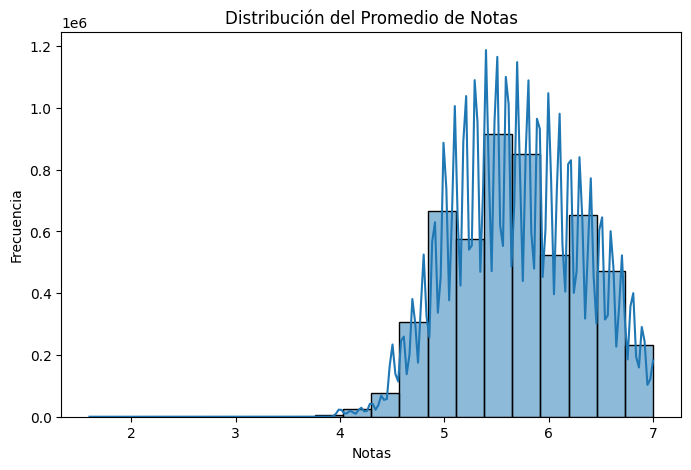

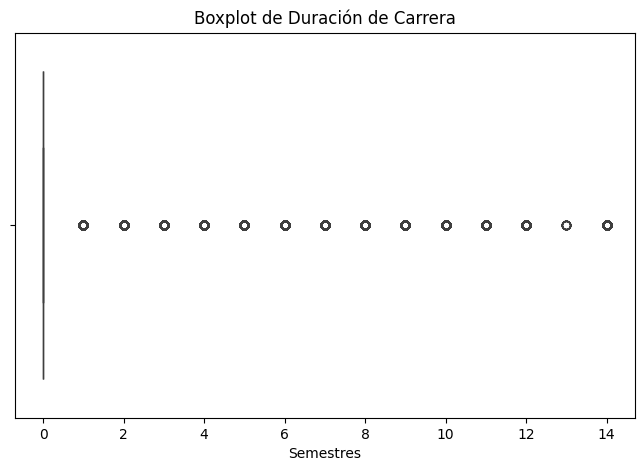

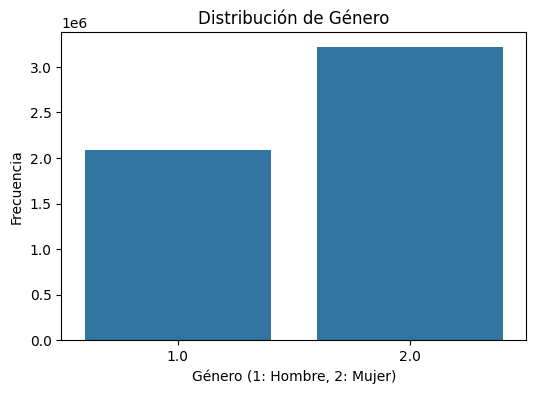

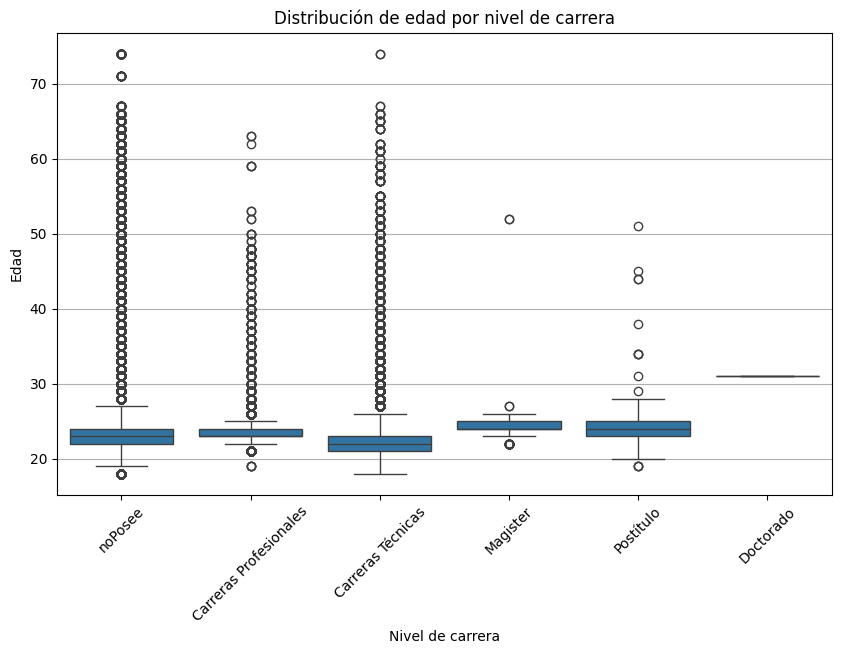

In [ ]:
# VARIABLES NUMÉRICAS
import seaborn as sns
import matplotlib.pyplot as plt

# histograma de Notas
plt.figure(figsize=(8, 5))
sns.histplot(df_final["PROM_NOTAS_ALU"], bins=20, kde=True)
plt.title("Distribución del Promedio de Notas")
plt.xlabel("Notas")
plt.ylabel("Frecuencia")
plt.show()

# boxplot de Duración Total de Carrera
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_final["dur_total_carr"])
plt.title("Boxplot de Duración de Carrera")
plt.xlabel("Semestres")
plt.show()

# gráfico de barras para Género
plt.figure(figsize=(6, 4))
sns.countplot(x=df_final["gen_alu"])
plt.title("Distribución de Género")
plt.xlabel("Género (1: Hombre, 2: Mujer)")
plt.ylabel("Frecuencia")
plt.show()

# boxplot de distribución de edad por nivel de carrera
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final, x='nivel_carrera_2', y='edad_2022')
plt.title('Distribución de edad por nivel de carrera')
plt.xlabel('Nivel de carrera')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Interpretación  resultados:**

*  Las notas tienen distribución sesgada hacia la izquierda (hay más estudiantes con notas altas que bajas). La mayoría de los estudiantes se encuentra en el rango entre 4.0 y 7.0, con un pico alrededor de 5.5. Aunque en menor proporción, también hay estudiantes con promedios entre 1.5 y 3.0, lo que indica la existencia de un grupo con bajo rendimiento académico, reflejando una cierta deficiencia en ese segmento.

*   Mayor concentración de datos en 0 semestres (la gran mayoría de los estudiantes no completaron una carrera, específicamente 5317294 de 5564049, es decir, solo 246755 completaron al menos una carrera), además se observa cierta variabilidad en la  duración de carreras para los que sí completaron una carrera.

*   Las carreras profesionales y técnicas concentran estudiantes entre los 22 y 23 años, pero con alta dispersión, lo que indica la presencia de personas mayores estudiando. Magíster, postítulo y doctorado presentan edades más elevadas, como es esperable. El grupo "no posee" tiene una edad constante cercana a los 23 años debido a la imputación de valores nulos con la mediana de quienes sí estudiaron, por lo que no refleja una distribución real.




**Conclusiones de hipótesis 1:**

*   Existe una mayor tendencia de género femenino en educación superior por diferencia respecto a los hombres, por lo tanto se rechaza la **hipótesis**.


2.   PARA VARIABLES CATEGORICAS

ver qué categorías tienen más representación y posibles sesgos:

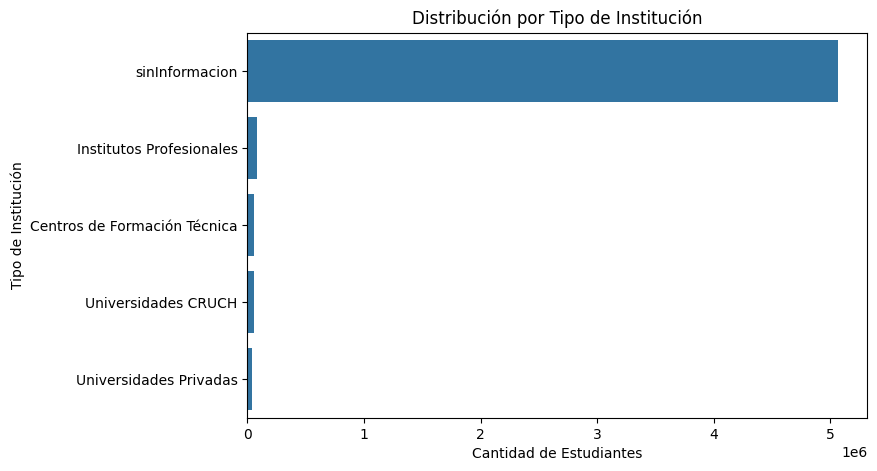

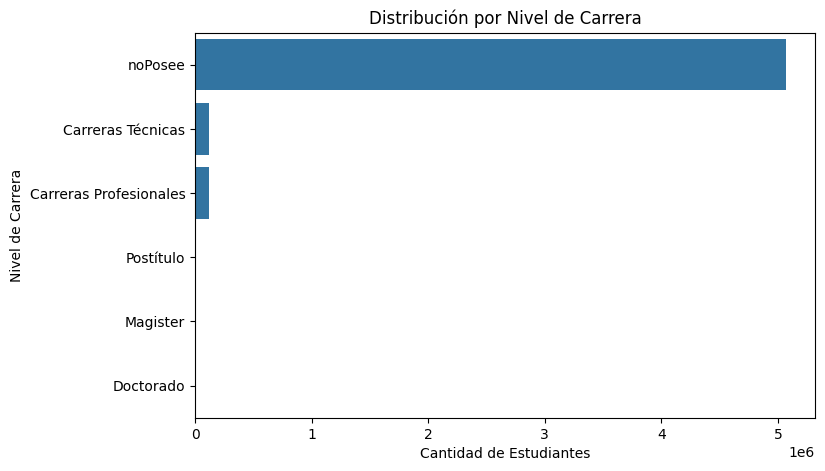

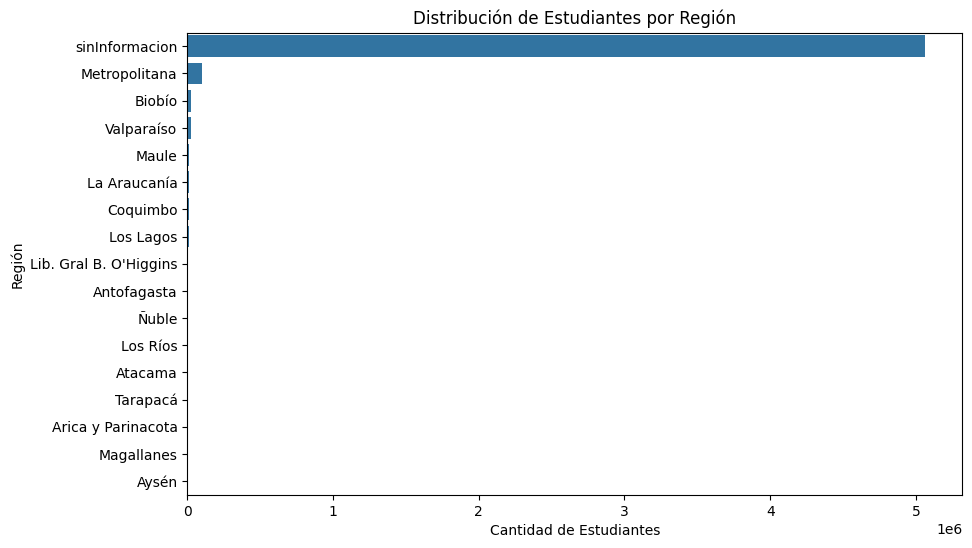

In [ ]:
# VARIABLES CATEGORICAS
# distribución de tipo de institución
plt.figure(figsize=(8, 5))
sns.countplot(y=df_final["tipo_inst_2"], order=df_final["tipo_inst_2"].value_counts().index)
plt.title("Distribución por Tipo de Institución")
plt.xlabel("Cantidad de Estudiantes")
plt.ylabel("Tipo de Institución")
plt.show()

# distribución de nivel de carrera
plt.figure(figsize=(8, 5))
sns.countplot(y=df_final["nivel_carrera_2"], order=df_final["nivel_carrera_2"].value_counts().index)
plt.title("Distribución por Nivel de Carrera")
plt.xlabel("Cantidad de Estudiantes")
plt.ylabel("Nivel de Carrera")
plt.show()

# distribución por región
plt.figure(figsize=(10, 6))
sns.countplot(y=df_final["region_sede"], order=df_final["region_sede"].value_counts().index)
plt.title("Distribución de Estudiantes por Región")
plt.xlabel("Cantidad de Estudiantes")
plt.ylabel("Región")
plt.show()

**Interpretación  resultados:**

*   Mayor registro de estudiantes sin información en tipo de institución, lo que indica que la gran mayoría de estudiantes no ingresaron a educación superior (categoría dominante en el df, lo que puede afectar el modelo -> balancear). Los institutos profesionales son los segundos tipos de institución mas preferidos por los estudiantes, aunque en muchísimo menor número.
*   Mayor registro de estudiantes sin una carrera completa al año 2022. Los segundos niveles de carrera más registrados, aunque en mucho menor número, fueron Carreras técnicas y Profesionales.
*   Nuevamente mayor registro de estudiantes sin información sobre su región de estudio en educación superior, debido a las mismas razones mencionadas anteriormente. La Región Metropolitana tiene el mayor número de estudiantes, mientras que Arica y Parinacota, Magallanes y Aysén tienen una menor cantidad de estudiantes, lo que podría deberse a menos instituciones educativas o menor acceso a educación superior.




**Conclusiones de hipótesis 2:**

*  Las personas sin ningun tipo de grado universitario superan de una manera abrubpta a los estudiantes titulados en el 2022 (superando con facilidad los 5 millones **considerando que el total son cerca de 5 millones y 600 mil**).






3.   CORRELACIONES ENTRE VARIABLES

ver qué variables tienen mayor relación con la educación superior.

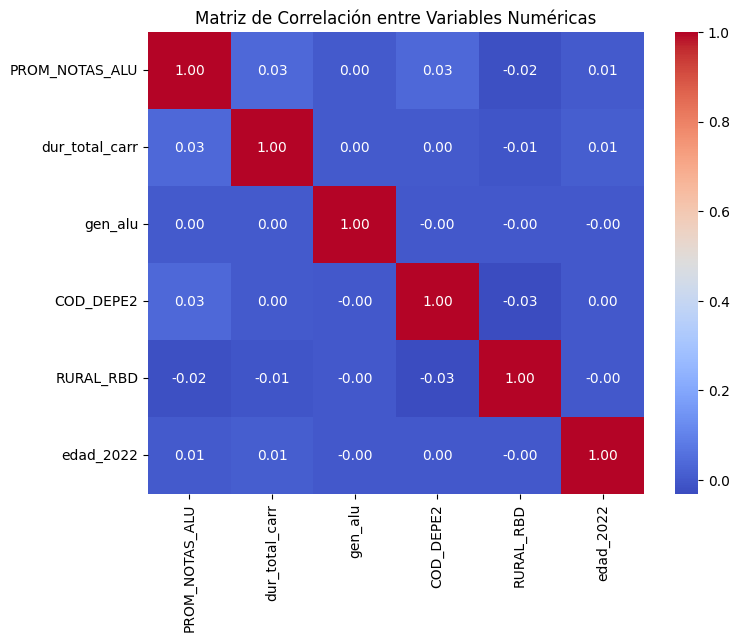

In [ ]:
# Matriz de correlación de variables numéricas
corr_matrix = df_final[["PROM_NOTAS_ALU", "dur_total_carr", "gen_alu", "COD_DEPE2", "RURAL_RBD",'edad_2022']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

**Interpretación  resultados:**

*   Todas las correlaciones observadas son muy bajas, lo que indica que no existen relaciones lineales fuertes entre las variables. La única excepción es la ligera correlación entre el código de dependencia y el promedio de notas, así como entre este último y la duración total de la carrera (0.03). Sin embargo, estos valores siguen siendo demasiado bajos como para considerarse significativos.


**Conclusiones de hipótesis 3:**

* La correlación entre edad_2022 y dur_total_carr es muy débil (0.01), lo que sugiere que no hay evidencia significativa de que los estudiantes de mayor edad tiendan a cursar carreras de mayor duración, por lo que se rechaza la hipótesis.





#2.2) GRÁFICOS CON ESTUDIANTES QUE POSEEN AL MENOS UNA CARRERA

In [ ]:
# Filtrar estudiantes que poseen una carrera de aquellos que no
df_filtrado = df_final[df_final["nivel_carrera_2"] != "noPosee"]

**Hipótesis 1:** Los estudiantes con alguna carrera poseen un promedio de notas mayor.

**Hipótesis 2:** Existen más estudiantes con títulos profesionales que técnicos.

**Hipótesis 3:** Los estudiantes con mejor rendimiento académico terminan antes sus estudios.


1.   PARA VARIABLES NUMÉRICAS

ver cómo están distribuidos los nuevos valores filtrados en notas, duración de estudios y género:

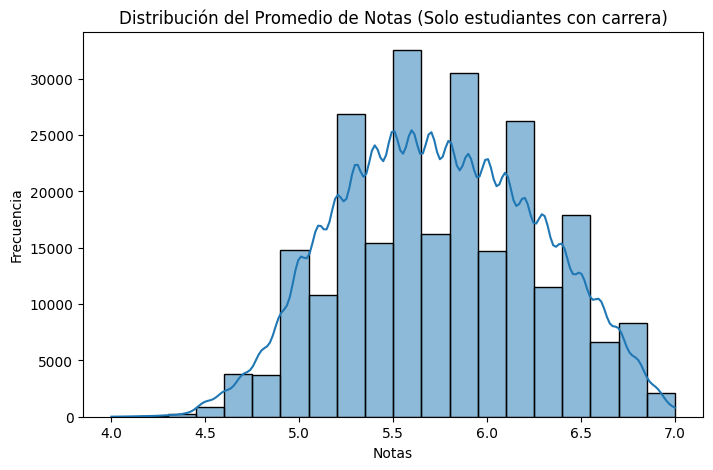

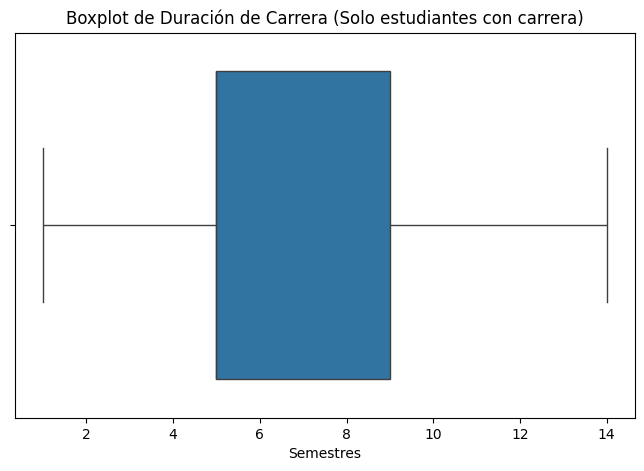

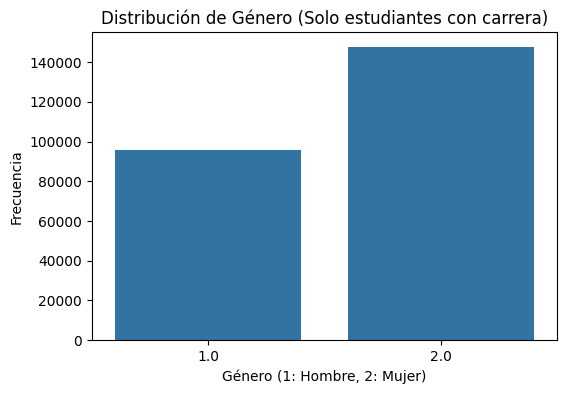

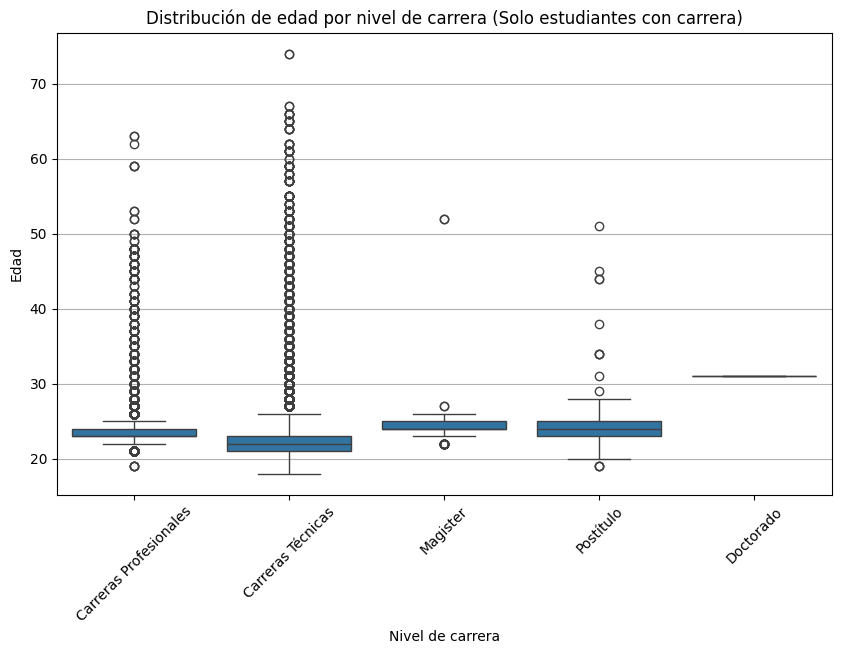

In [ ]:
# VARIABLES NUMÉRICAS
import seaborn as sns
import matplotlib.pyplot as plt

# histograma de Notas
plt.figure(figsize=(8, 5))
sns.histplot(df_filtrado["PROM_NOTAS_ALU"], bins=20, kde=True)
plt.title("Distribución del Promedio de Notas (Solo estudiantes con carrera)")
plt.xlabel("Notas")
plt.ylabel("Frecuencia")
plt.show()

# boxplot de Duración Total de Carrera
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_filtrado["dur_total_carr"])
plt.title("Boxplot de Duración de Carrera (Solo estudiantes con carrera)")
plt.xlabel("Semestres")
plt.show()

# gráfico de barras para Género
plt.figure(figsize=(6, 4))
sns.countplot(x=df_filtrado["gen_alu"])
plt.title("Distribución de Género (Solo estudiantes con carrera)")
plt.xlabel("Género (1: Hombre, 2: Mujer)")
plt.ylabel("Frecuencia")
plt.show()

# boxplot de distribución de edad por nivel de carrera
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtrado, x='nivel_carrera_2', y='edad_2022')
plt.title('Distribución de edad por nivel de carrera (Solo estudiantes con carrera)')
plt.xlabel('Nivel de carrera')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Interpretación resultados:**

*   La mayoría de estudiantes tienen un promedio de notas entre 5.0 y 6.0, con un pico en 5.5, lo que muestra una mejoría comparada al incluir los promedios de estudiantes que no estudiaron una carrera. Se observa una distribucion levemente sesgada a la izquierda, lo que indica que hay pocos estudiantes con notas extremadamente bajas.


*   La mediana está alrededor de 8 semestres (lo que coincide con la duración promedio esperada de carreras universitarias), mientras que el rango intercuartílico va de 6 a 10 semestres, indicando que la mayoría de los estudiantes completaron sus estudios dentro de ese tiempo.

*   Nuevamente se observa una mayoría de estudiantes del genero femenino, pero esta vez más estable en comparación a los resultados obtenidos incluyendo estudiantes que no completaron una carrera.

*   La mayoría de los estudiantes en Carreras Profesionales y Técnicas tienen entre 20 y 30 años, con algunos valores atípicos que alcanzan los 60 años. Para los magíster y Postitulo, la concentración de edad está entre los 25 y 35 años, lo que indica que estos programas suelen atraer personas con experiencia académica o laboral previa, con valores extremos menos frecuentes. Para Doctorados, La distribución es más homogénea, centrada en los 30 años, sin valores atípicos significativos.


**Conclusiones de hipótesis 1:**

* Los estudiantes que poseen algún título presentan, en general, promedios de notas más altos que la población total de egresados de enseñanza media. La mayoría se concentra entre los 5.0 y 6.0, con un sesgo hacia los valores superiores.

2.   PARA VARIABLES CATEGORICAS

ver qué nuevas categorías filtradas tienen más representación y posibles sesgos:

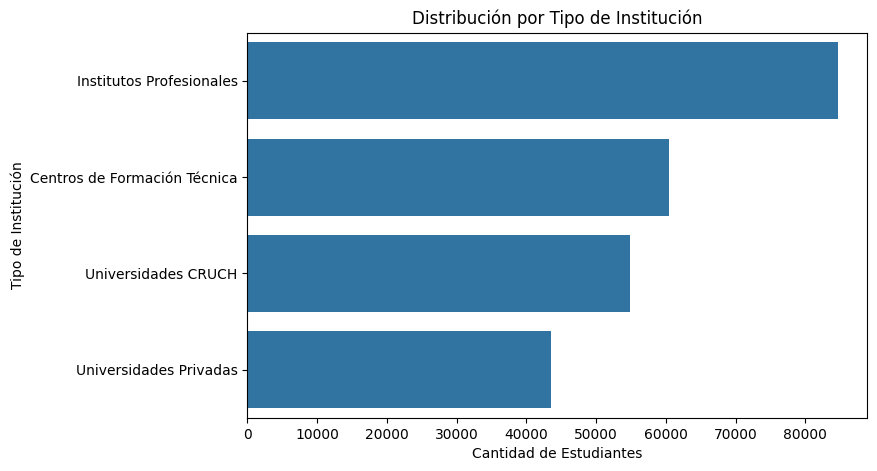

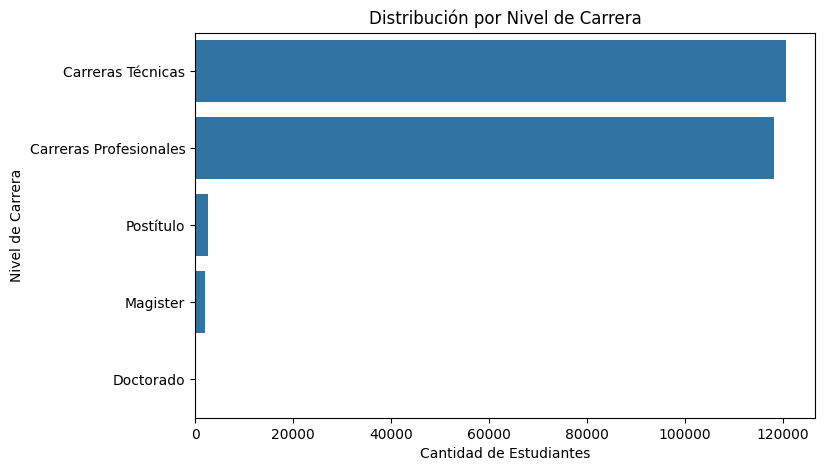

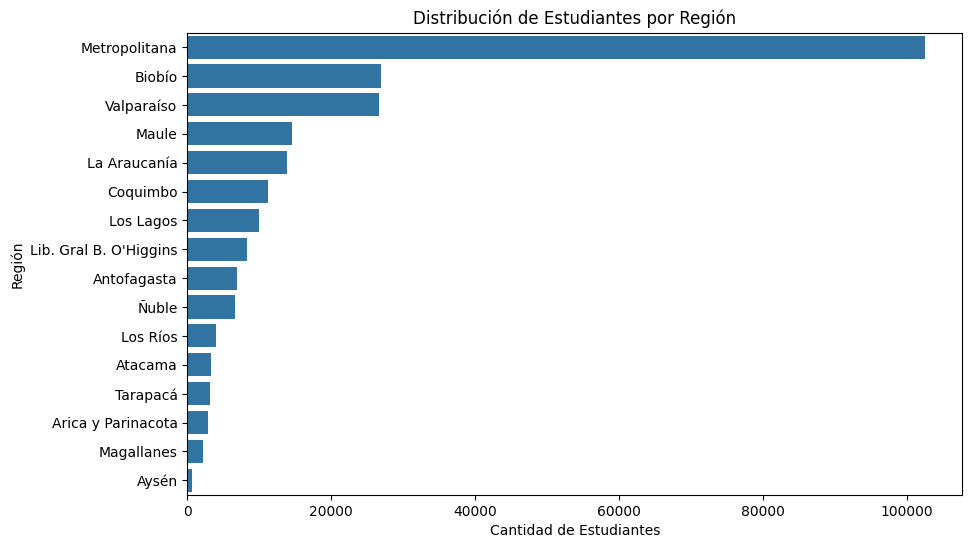

In [ ]:
# VARIABLES CATEGORICAS
# distribución de tipo de institución
plt.figure(figsize=(8, 5))
sns.countplot(y=df_filtrado["tipo_inst_2"], order=df_filtrado["tipo_inst_2"].value_counts().index)
plt.title("Distribución por Tipo de Institución")
plt.xlabel("Cantidad de Estudiantes")
plt.ylabel("Tipo de Institución")
plt.show()

# distribución de nivel de carrera
plt.figure(figsize=(8, 5))
sns.countplot(y=df_filtrado["nivel_carrera_2"], order=df_filtrado["nivel_carrera_2"].value_counts().index)
plt.title("Distribución por Nivel de Carrera")
plt.xlabel("Cantidad de Estudiantes")
plt.ylabel("Nivel de Carrera")
plt.show()

# distribución por región
plt.figure(figsize=(10, 6))
sns.countplot(y=df_filtrado["region_sede"], order=df_filtrado["region_sede"].value_counts().index)
plt.title("Distribución de Estudiantes por Región")
plt.xlabel("Cantidad de Estudiantes")
plt.ylabel("Región")
plt.show()



*   La  mayoría de estudiantes prefieren estudiar en Institutos Profesionales (IP), seguidos por los Centros de Formación Tecnica (CFT), a diferencia de completar sus estudios superiores en una Universidad Privada. Esto puede deberse a una combinación de factores, incluyendo la deserción estudiantil, cambios en las preferencias vocacionales, el impacto de la pandemia de COVID-19 (2019) y la influencia de factores socioeconómicos como los costos por matrícula.

*   Las Carreras Técnicas y Profesionales concentran la mayor cantidad de estudiantes, mientras que los niveles avanzados como Postítulo, Magíster y Doctorado tienen menor representación. Esto sugiere que los estudiantes priorizan opciones más cortas y accesibles económicamente, ya que cada título adicional implica costos adicionales de matrícula.

* Las regiones con mayor cantidad de estudiantes son la Metropolitana, el Biobío y Valparaíso, siendo las más escasas la región de Aysén y Magallanes. Estas tres primeras coinciden con las regiones con mayor población a lo largo de Chile, en el mismo orden. Esto demuestra que en estas zonas existe un mejor acceso a la educación, mejores condiciones económicas y mayor demanda laboral. Además, la migración estudiantil puede impactar la distribución de titulados en distintas zonas.

**Conclusiones de hipótesis 2:**

* Si bien se observa que hay más estudiantes que egresan de Institutos Profesionales que de Centros de Formación Técnica, la cantidad de titulados con un grado técnico es mayor. Por lo tanto, se rechaza la hipótesis inicial: en realidad, existe una mayor proporción de titulados técnicos que profesionales.


3.   CORRELACIONES ENTRE VARIABLES

ver qué variables tienen mayor relación con la educación superior.

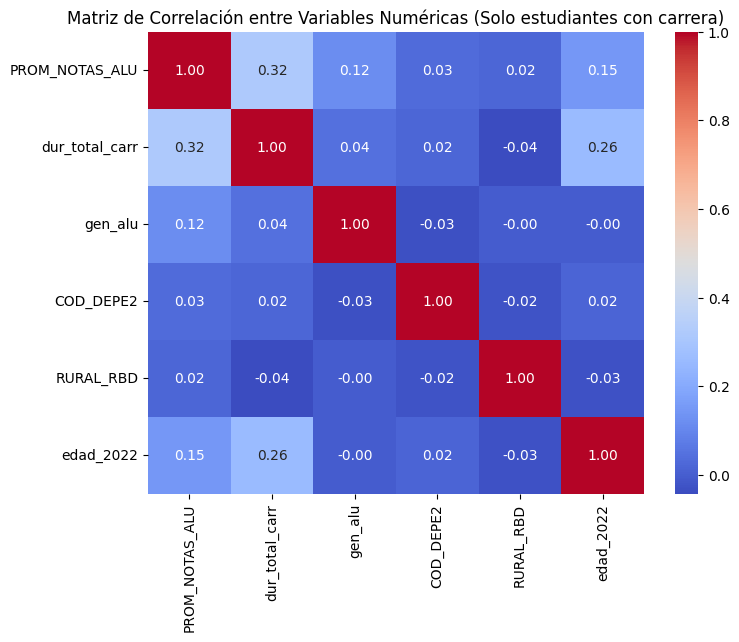

In [ ]:
corr_matrix = df_filtrado[["PROM_NOTAS_ALU", "dur_total_carr", "gen_alu", "COD_DEPE2", "RURAL_RBD",'edad_2022']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas (Solo estudiantes con carrera)")
plt.show()

**Interpretación resultados:**
* Promedio de Notas muestra una correlación moderada (0.32) con la duración total de la carrera, lo que podría indicar que los estudiantes con carreras más largas tienden a tener un desempeño ligeramente superior.

* Edad tiene una correlación positiva con la duración de la carrera (0.26), lo que sugiere que los estudiantes mayores tienden a estar en programas más extensos.

* Género muestra una correlación baja pero existente con el promedio de notas. Aunque el impacto es leve, podría indicar tendencias sutiles en el rendimiento académico.

* Dependencia Educativa y Zona Rural tienen correlaciones débiles con otras variables, lo que implica que estos factores no tienen una influencia fuerte en el rendimiento académico

**Conclusiones de hipótesis 3:**
* La correlación entre el promedio de notas y la duración total de la carrera es de 0.32, lo que indica una relación positiva débil. En lugar de terminar más rápido, los estudiantes con mejor promedio tienden a estar un poco más tiempo en la carrera.




---

# Para una mejor entrenamiento y testeo, hemos decidio convertir las variables categóricas a numéricas.

In [ ]:
df_final.head()

,mrun,gen_alu,edad_2022,PROM_NOTAS_ALU,COD_DEPE2,RURAL_RBD,ENSE_COMPLETA,tipo_inst_2,nivel_carrera_2,dur_total_carr,area_cineunesco,region_sede
0,17,2.0,59.0,6.0,4,0,1,sinInformacion,noPosee,0.0,sinInformacion,sinInformacion
1,18,2.0,23.0,5.6,5,0,1,sinInformacion,noPosee,0.0,sinInformacion,sinInformacion
2,19,2.0,21.0,5.2,2,0,1,sinInformacion,noPosee,0.0,sinInformacion,sinInformacion
3,20,1.0,21.0,4.7,2,0,1,sinInformacion,noPosee,0.0,sinInformacion,sinInformacion
4,35,2.0,23.0,6.2,1,0,1,sinInformacion,noPosee,0.0,sinInformacion,sinInformacion


In [ ]:
# Convertir variables categóricas a tipo category y luego a numérico para ahorar pasos para el modelado
categ_cols = ['nivel_carrera_2','tipo_inst_2','area_cineunesco','region_sede']

df_final.info()

print("📘 Glosario de categorías:\n")
for col in categ_cols:
    cat_col = df_final[col].astype('category')
    print(f"▶️ {col}:")
    for code, label in enumerate(cat_col.cat.categories):
        print(f"   {code} → {label}")
    print()

df_final[categ_cols] = df_final[categ_cols].apply(lambda col: col.astype('category').cat.codes)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5308121 entries, 0 to 5564180
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   mrun             int64  
 1   gen_alu          float64
 2   edad_2022        float64
 3   PROM_NOTAS_ALU   float64
 4   COD_DEPE2        Int64  
 5   RURAL_RBD        Int64  
 6   ENSE_COMPLETA    int64  
 7   tipo_inst_2      object 
 8   nivel_carrera_2  object 
 9   dur_total_carr   float64
 10  area_cineunesco  object 
 11  region_sede      object 
dtypes: Int64(2), float64(4), int64(2), object(4)
memory usage: 536.6+ MB
📘 Glosario de categorías:

▶️ nivel_carrera_2:
   0 → Carreras Profesionales
   1 → Carreras Técnicas
   2 → Doctorado
   3 → Magister
   4 → Postítulo
   5 → noPosee

▶️ tipo_inst_2:
   0 → Centros de Formación Técnica
   1 → Institutos Profesionales
   2 → Universidades CRUCH
   3 → Universidades Privadas
   4 → sinInformacion

▶️ area_cineunesco:
   0 → Administración y Comercio
   1 → Agrope

<ipython-input-17-a86220b64bcf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[categ_cols] = df_final[categ_cols].apply(lambda col: col.astype('category').cat.codes)


In [ ]:
df_final.head()

,mrun,gen_alu,edad_2022,PROM_NOTAS_ALU,COD_DEPE2,RURAL_RBD,ENSE_COMPLETA,tipo_inst_2,nivel_carrera_2,dur_total_carr,area_cineunesco,region_sede
0,17,2.0,59.0,6.0,4,0,1,4,5,0.0,10,15
1,18,2.0,23.0,5.6,5,0,1,4,5,0.0,10,15
2,19,2.0,21.0,5.2,2,0,1,4,5,0.0,10,15
3,20,1.0,21.0,4.7,2,0,1,4,5,0.0,10,15
4,35,2.0,23.0,6.2,1,0,1,4,5,0.0,10,15


# Entrenamiento y testeo con predicción a nivel NACIONAL (Balanceado)

Hemos decidido añadir una función la cual se encarga de emparejar los datos, ya que existe una abrutpa diferencia entre la cantidad de personas que no estudiaron y las que si lo hicieron (en todos los grados juntos) por lo tanto sin tratar de quitar la suficiente informacion y el sesgo cargado hacia las personas que no estudiaron.


* Ahora son 246.755 personas sin estudios , de las 5.317.294 que eran en total antes del balanceo

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.stats import randint as sp_randint, uniform
import pandas as pd
import numpy as np
import time

# ================================
# CONFIGURACIONES
# ================================
RANDOM_STATE = 42
columnas_categoricas = []

def crear_pipeline(modelo, X):
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ]
    )
    return Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', modelo)
    ])

def balancear_df_eficiente(df):
    df_min = df[df['nivel_carrera_2'] != 5]
    df_maj = df[df['nivel_carrera_2'] == 5].sample(len(df_min), random_state=RANDOM_STATE)
    return pd.concat([df_min, df_maj], ignore_index=True)

def medir_tiempo(func):
    def wrapper(*args, **kwargs):
        inicio = time.time()
        resultado = func(*args, **kwargs)
        fin = time.time()
        print(f"Tiempo de ejecución: {fin - inicio:.2f} segundos")
        return resultado
    return wrapper

@medir_tiempo
def ajustar_modelo(nombre, modelo, X, y_train, usar_randomsearch=False):
    pipeline = crear_pipeline(modelo, X)
    if usar_randomsearch:
        if nombre == 'DecisionTree':
            param_dist = {
                'classifier__max_depth': [None, 5, 10],
                'classifier__min_samples_split': [2, 5, 10],
                'classifier__min_impurity_decrease': [0, 0.01, 0.1],
                'classifier__class_weight': ['balanced', 'balanced_subsample']
            }
        elif nombre == 'RandomForest':
            param_dist = {
                'classifier__n_estimators': [50, 100, 200],
                'classifier__max_depth': [None, 5, 10],
                'classifier__min_samples_split': [2, 5, 10],
                'classifier__class_weight': ['balanced', 'balanced_subsample']
            }
        elif nombre == 'LinearSVC':
            param_dist = {
                'classifier__C': [0.1, 1, 10],
                'classifier__penalty': ['l2', 'l1'],
                'classifier__loss': ['squared_hinge', 'hinge'],
                'classifier__class_weight': ['balanced', None]
            }
        random_search = RandomizedSearchCV(
            pipeline,
            param_dist,
            cv=3,
            n_iter=5,
            scoring='f1_macro',
            random_state=RANDOM_STATE,
            n_jobs=-1
        )
        random_search.fit(X, y_train)
        return random_search.best_estimator_
    pipeline.fit(X, y_train)
    return pipeline

@medir_tiempo
def evaluar_modelo(nombre, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    print(f"\n🔍 Modelo: {nombre}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall (macro): {rec:.4f}")
    print(f"F1-score (macro): {f1:.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred, zero_division=0)}")
    return {
        'Modelo': nombre,
        'Accuracy': acc,
        'Precision (macro)': prec,
        'Recall (macro)': rec,
        'F1-score (macro)': f1
    }

@medir_tiempo
def entrenamiento_global(df, modelos_dict, usar_randomsearch=False):
    df_bal = balancear_df_eficiente(df)
    X = df_bal.drop(columns=['nivel_carrera_2'])
    y = df_bal['nivel_carrera_2']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    resultados = []
    fitted_models = {}  # <-- para guardar las pipelines

    for nombre, modelo in modelos_dict.items():
        # entreno y guardo pipeline
        modelo_ajustado = ajustar_modelo(nombre, modelo, X_train, y_train, usar_randomsearch)
        fitted_models[nombre] = modelo_ajustado

        # evalúo y guardo métricas
        resultado = evaluar_modelo(nombre, modelo_ajustado, X_test, y_test)
        resultados.append(resultado)

    df_resultados = pd.DataFrame(resultados).sort_values(
        by='F1-score (macro)', ascending=False
    ).reset_index(drop=True)

    print("\n📊 Comparación de modelos global:")
    print(df_resultados)

    # <-- devuelvo AMBOS
    return df_resultados, fitted_models

# ================================
# USO DEL SCRIPT
# ================================
modelos = {
    'DecisionTree': DecisionTreeClassifier(
        random_state=RANDOM_STATE,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced'
    ),
    'RandomForest': RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced_subsample',
        random_state=RANDOM_STATE,
        n_jobs=-1
    ),
    'LinearSVC': LinearSVC(
        penalty='l2',
        loss='squared_hinge',
        dual=True,
        tol=0.0001,
        C=1.0,
        multi_class='ovr',
        fit_intercept=True,
        intercept_scaling=1,
        class_weight=None,
        verbose=2,
        random_state=RANDOM_STATE,
        max_iter=1000
    )
}

# Entrenamiento global con búsqueda aleatoria activada
df_res_global, modelos_ajustados = entrenamiento_global(df_final, modelos, usar_randomsearch=True)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args,

Tiempo de ejecución: 13.81 segundos

🔍 Modelo: DecisionTree
Accuracy: 0.9843
Precision (macro): 0.7602
Recall (macro): 0.9131
F1-score (macro): 0.8093
Confusion Matrix:
[[22988   405   113   107     0]
 [   12 23348   426   292     0]
 [    0     6   351    70     0]
 [    0    11    89   401     0]
 [    0     0     0     0 48731]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     23613
           1       0.98      0.97      0.98     24078
           3       0.36      0.82      0.50       427
           4       0.46      0.80      0.58       501
           5       1.00      1.00      1.00     48731

    accuracy                           0.98     97350
   macro avg       0.76      0.91      0.81     97350
weighted avg       0.99      0.98      0.99     97350

Tiempo de ejecución: 0.27 segundos


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Tiempo de ejecución: 301.69 segundos

🔍 Modelo: RandomForest
Accuracy: 0.9843
Precision (macro): 0.7584
Recall (macro): 0.9021
F1-score (macro): 0.8060
Confusion Matrix:
[[22981   417    62   153     0]
 [    9 23384   310   375     0]
 [    0     6   321   100     0]
 [    0    16    77   408     0]
 [    0     0     0     0 48731]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     23613
           1       0.98      0.97      0.98     24078
           3       0.42      0.75      0.54       427
           4       0.39      0.81      0.53       501
           5       1.00      1.00      1.00     48731

    accuracy                           0.98     97350
   macro avg       0.76      0.90      0.81     97350
weighted avg       0.99      0.98      0.99     97350

Tiempo de ejecución: 0.80 segundos


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args,

[LibLinear]

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Tiempo de ejecución: 3024.85 segundos

🔍 Modelo: LinearSVC
Accuracy: 0.9743
Precision (macro): 0.6928
Recall (macro): 0.7904
F1-score (macro): 0.7203
Confusion Matrix:
[[23161   318    69    65     0]
 [  506 22480   728   364     0]
 [    0    76   259    92     0]
 [    0   140   145   216     0]
 [    0     0     0     0 48731]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     23613
           1       0.98      0.93      0.95     24078
           3       0.22      0.61      0.32       427
           4       0.29      0.43      0.35       501
           5       1.00      1.00      1.00     48731

    accuracy                           0.97     97350
   macro avg       0.69      0.79      0.72     97350
weighted avg       0.98      0.97      0.98     97350

Tiempo de ejecución: 0.30 segundos

📊 Comparación de modelos global:
         Modelo  Accuracy  Precision (macro)  Recall (macro)  F1-score (macro)
0  Dec

**Conclusiones generales de los modelos en la predicción de grados universitarios (evaluación global):**
* El modelo que mejor rendimiento mostró fue **DecisionTree**, ya que obtuvo la mejor combinación de métricas: una accuracy del 98.42%, una precisión macro del 76.02%, recall macro de 91.31% y un F1-score macro de 80.93%. Esto indica que predijo bastante bien las diferentes clases y mantuvo un buen equilibrio entre precisión y cobertura.

* Muy cerca estuvo **RandomForest**, que tuvo una accuracy apenas superior (98.43%), pero con métricas un poco más bajas en precisión, recall y F1-score. En general, también fue muy efectivo, pero el árbol de decisión tuvo un desempeño más balanceado.

* Por último, **LinearSVC** fue el que más tardó en ejecutarse y también el que tuvo peores resultados. Su accuracy fue de 97.43%, y sus métricas macro (precisión: 69.28%, F1: 72.03%) muestran que le costó más distinguir bien entre clases.

#Testeo por regiones


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

@medir_tiempo
def evaluar_por_region(df, modelos_ajustados, feature_cols=None, target_col='nivel_carrera_2'):
    resultados = []

    # determinar columnas de características
    if feature_cols is None:
        feature_cols = [c for c in df.columns if c not in (target_col, 'region_sede')]

    for region in df['region_sede'].unique():
        df_reg = df[df['region_sede'] == region]
        if df_reg.empty:
            continue

        X_reg = df_reg[feature_cols]
        y_true = df_reg[target_col]

        for nombre, modelo in modelos_ajustados.items():
            y_pred = modelo.predict(X_reg)

            acc  = accuracy_score(y_true, y_pred)
            prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
            rec  = recall_score(y_true, y_pred, average='macro', zero_division=0)
            f1   = f1_score(y_true, y_pred, average='macro', zero_division=0)

            resultados.append({
                'Región': region,
                'Modelo': nombre,
                'Accuracy': acc,
                'Precision (macro)': prec,
                'Recall (macro)': rec,
                'F1-score (macro)': f1
            })

    df_res = (
        pd.DataFrame(resultados)
          .sort_values(['Región', 'F1-score (macro)'], ascending=[True, False])
          .reset_index(drop=True)
    )
    print("\n📊 Resultados por región:")
    print(df_res)
    return df_res

df_res_region = evaluar_por_region(df_final, modelos_ajustados)


📊 Resultados por región:
    Región        Modelo  Accuracy  Precision (macro)  Recall (macro)  \
0        0  RandomForest  0.969063           0.503522        0.734671   
1        0  DecisionTree  0.955556           0.503306        0.728940   
2        0     LinearSVC  0.955410           0.498891        0.646090   
3        1  RandomForest  0.971201           0.498637        0.486582   
4        1  DecisionTree  0.969466           0.498030        0.485850   
5        1     LinearSVC  0.942054           0.495844        0.474273   
6        2  RandomForest  0.969041           0.510114        0.734048   
7        2  DecisionTree  0.956417           0.505145        0.729934   
8        2     LinearSVC  0.904418           0.458657        0.463182   
9        3  DecisionTree  0.945865           0.499069        0.469819   
10       3  RandomForest  0.939850           0.500000        0.468046   
11       3     LinearSVC  0.885714           0.483994        0.452088   
12       4  DecisionTree 

**Conclusiones de el testeo en regiones:**

* **RandomForest** fue el modelo con mejor rendimiento en la mayoría de las regiones: se impuso en 9 de las 17 (sin contar la categoría "sinInformación"). Destacó sobre todo en regiones del sur y más rurales, como La Araucanía, Los Lagos, Los Ríos, y Ñuble, donde logró buenos niveles de precisión y recall incluso con el desbalance de clases.

* **DecisionTree** lideró en 7 regiones. Fue especialmente efectivo en zonas donde los datos están más desbalanceados o hay menos muestras, como Aysén, Atacama, Maule o Valparaíso. Su desempeño fue bastante parejo, aunque en algunas regiones quedó muy cerca del RandomForest.

* **LinearSVC** por otro lado, no logró ser el mejor modelo en ninguna región. Si bien en algunas zonas tuvo buenos niveles de accuracy, sus métricas de recall y F1-score fueron consistentemente más bajas que los modelos basados en árboles.

* En la categoría “sinInformación” tanto **RandomForest** como **DecisionTree** obtuvieron un rendimiento perfecto, con todas las métricas en 1.0. Esto probablemente se debe a que los datos en esa categoría son muy homogéneos o directamente fáciles de clasificar.

---

**Modelo con mejor desempeño general: RandomForest.**

Aunque DecisionTree mostró un buen desempeño en la evaluación global, RandomForest demostró un comportamiento superior al analizar los datos con mayor granularidad (por región). Este destacó por obtener el mayor F1-score en la mayoría de las regiones (9 de 17 con datos balanceados) y por mantener un rendimiento consistente incluso en contextos con desbalance de clases. Esta mayor capacidad de generalización frente a DecisionTree y LinearSVC, tanto en regiones con alta como baja cantidad de muestras, lo posiciona como el modelo más recomendable para problemas como este.